# **CAP-417: Estatística Computacional (Computational Statistics)**

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/thedice.jpg" alt="Drawing" width="350"/>

<br>

# ***Discrete Random Variables and Probability Distributions***
-----

This notebook was developed by Prof. <a href="https://www.linkedin.com/in/valdivino-alexandre-de-santiago-j%C3%BAnior-103109206/?locale=en_US">Valdivino Alexandre de Santiago Júnior</a> for the Computational Statistics CAP course at INPE.</a>

<br>

Most of this material was based on: R. E. Walpole, R. H. Myers, S. L. Myers, K. E. Ye. <a href="https://www.pearson.com/us/higher-education/product/Walpole-Probability-and-Statistics-for-Engineers-and-Scientists-9th-Edition/9780321629111.html">Probability and Statistics for Engineers and Scientists, 9th Edition</a>. Pearson, 2012.

<br>

**Licence**: GNU GENERAL PUBLIC LICENSE, Version 3 (GPLv3)



## Random Variable
----

A **random variable** is a function that reflects the result of a random experiment. It associates a real number with each element $s \in S$.

<br>

For instance, the result of the experiment "toss a single die" can be described by a random variable $X \Rightarrow X = \{1, 2, 3, 4, 5, 6\}$. 

<br>

Another example: two balls are drawn in succession without replacement from an urn containing 4 red balls and 3 black balls. Hence, the number of red balls is a random variable $X \Rightarrow X = \{0, 1, 2\}$.

<br>

A random variable is described by the possible values that it can assume ($x$) and by the probabilities for each of these values ($f(x)$).




## Discrete Random Variable 
----

A **discrete random variable** can only assume discrete values where the discrete values are often non-negative integers. The two previous examples are cases of disrete random variables.


<br>

A discrete random variable assumes each of its values with a certain probability. Frequently, it is useful to represent all the probabilities of a random variable $X$ by a formula.




## Discrete Probability Distributions
----

Below, it is the definition of a **probability mass function** (**pmf**), or simply **probability distribution**, related to discrete random variables.

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/pmf.png" alt="Drawing" width="600"/>

<br>
<br>




## Cumulative Distribution Function
----

In many problems, we want to obtain the probability that the observed value of a random variable $X$ will be less than or equal to some real number $x$. Hence, we rely on the **cumulative distribution function** (cdf).

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/cdf.png" alt="Drawing" width="600"/>

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/cdfprop.png" alt="Drawing" width="600"/>

<br>

Ex: Let $X$ be the random variable related to rolling a fair six-sided die. Calculate $F(x)$.

R: $P(X=k) = \frac{1}{6}$ for $k = 1, 2, \cdots 6$. Hence:

$$
P(X \leq 1) = F(1) = f(1) = \frac{1}{6} \\
P(X \leq 2) = F(2) = f(1) + f(2) = \frac{2}{6} =  \frac{1}{3} \\
P(X \leq 3) = F(3) = f(1) + f(2) + f(3) = \frac{3}{6} = \frac{1}{2} \\
\cdots \\
P(X \leq 6) = F(6) = f(1) + f(2) + f(3) + f(4) + f(5) + f(6) = \frac{6}{6} = 1 
$$


Ex: Suppose that three items are selected at random from a manufacturing process (as we have already presented). Each item is inspected and classified as defective, $D$, or nondefective, $N$. We would like to know about the defective items. Hence, a defective item is a success case (1). Assuming the items are selected independently and also that the process produces
$25\%$ defectives, calculate the pmf (probability distribution) of the random variable, $X$, related to this problem.

In [ ]:
'''
Note that the probability of success, p, remains constant from trial to trial.
Moreover, the repeated trials are independent.
'''

from fractions import Fraction
from prettytable import PrettyTable

def calculate_pmf_bin1(x, p):
  un_x = set(x)
  print('Possible values of x: ', un_x)
  f_x = [] # P(X = x)

  '''
  Note that, since the trials are indepenent, we can rely on Theorem 2.11 (see notebook A01).
  Hence: P(A and B) = P(A)P(B). We can extend it to n independent events.
  '''

  for i in un_x:
    if i == 0: # NNN
      f_x.append(x.count(i)*(1-p)*(1-p)*(1-p))
    elif i == 1: # NDN, NND, DNN
      f_x.append(x.count(i)*(1-p)*(1-p)*p)
    elif i == 2: # NDD, DND, DDN
      f_x.append(x.count(i)*(1-p)*p*p)
    elif i == 3: # DDD
      f_x.append(x.count(i)*p*p*p)
    else:
      print('Invalid option!') 
  print('\n pmf: \n')     
  table = PrettyTable(["x", "f(x)"])
  for index, item in enumerate(f_x):
    table.add_row([index, Fraction(item).limit_denominator()])
  print(table)

  
'''
x = outcomes. The value of x corresponds to the number of D (1). Hence, NNN = 0, NDN = 1, 
NND = 1, ..., DDD = 3.
''' 
x_out = [0, 1, 1, 1, 2, 2, 2, 3] 
prob = 0.25

calculate_pmf_bin1(x_out, prob)

Possible values of x:  {0, 1, 2, 3}

 pmf: 

+---+-------+
| x |  f(x) |
+---+-------+
| 0 | 27/64 |
| 1 | 27/64 |
| 2 |  9/64 |
| 3 |  1/64 |
+---+-------+


## Bernoulli Process and Binomial Distribution
----

The example above is a case of a **Bernoulli Process**. Such a process must have the following properties:

1. The experiment consists of repeated trials;
2. Each trial results in an outcome that may be classified as a success or a failure;
3. The probability of success, denoted by p, remains constant from trial to trial;
4. The repeated trials are independent.

<br>

The number $X$ of successes in $n$ Bernoulli trials is called a **binomial random variable**. The probability distribution of this discrete random variable is called the **binomial distribution**. Its values are denoted by $b(x;n,p)$, where $n$ is the number of trials and $p$ is the success probability. More formally.


<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/binomialdist.png" alt="Drawing" width="600"/>

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/binomialexp.png" alt="Drawing" width="600"/>

Source: <a href="https://distribution-explorer.github.io/discrete/binomial.html?highlight=binomial">Distribution Explorer</a>

<br>
<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/binommeanvar.png" alt="Drawing" width="600"/>

<br>
<br>

Question: How to calculate the mean (expected value) and variance of a discrete random variable?

<br>

The binomial distribution finds applications in many areas such as industrial quality control, medical, and military applications. 

<br>

Considering the previous example:

$$
P(X = 2) = f(2) = b(2;3,\frac{1}{4}) = {3\choose 2} \times (\frac{1}{4})^2 \times (\frac{3}{4})^{(3-2)} = 3 \times \frac{1}{16} \times \frac{3}{4} = \frac{9}{64}. 
$$

<br>

We can create another function to solve the previous example in a more general way.

<br>

**PS**: Below, we show the **probability histogram** too. It is a way to visualise a pmf (probability distribution). The rectangles are constructed so that their bases of equal width are centered at each value $x$ and their heights are equal to the corresponding probabilities, i.e. $f(x)$. The bases are constructed so as to leave no space between the rectangles. But note that, below, we changed the width = 0.95 just for better presentation. Hence, assuming that each base has unit width (width = 1), $f(x) = P(X = x)$ is equal to the area of the rectangle centered at $x$. There are many other "fancy" ways to show a histogram in Python.

Possible values of x:  [0, 1, 2, 3]

 pmf: 

+---+-------+
| x |  f(x) |
+---+-------+
| 0 | 27/64 |
| 1 | 27/64 |
| 2 |  9/64 |
| 3 |  1/64 |
+---+-------+




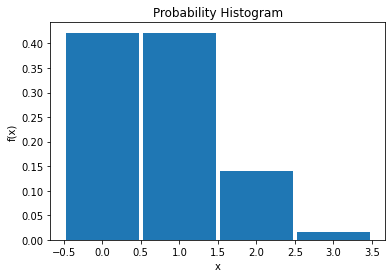

In [ ]:
import math
import matplotlib.pyplot as plt

def calculate_pmf_bin2(n,p):
  x = list(range(n+1))
  print('Possible values of x: ', x)
  f_x = []
  for i in range(len(x)):
    comb = math.factorial(n)/(math.factorial(x[i]) * math.factorial(n-x[i]))
    f_x.append(comb*(p**x[i])*((1-p)**(n-x[i])))

  print('\n pmf: \n')     
  table = PrettyTable(["x", "f(x)"])
  for index, item in enumerate(f_x):
    table.add_row([index, Fraction(item).limit_denominator()])
  print(table)
  return x, f_x  
  

x_2, f_x2 = calculate_pmf_bin2(3,0.25)
print('\n')
plt.bar(x_2, f_x2, width = 0.95)
plt.title("Probability Histogram")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

## SciPy
----

<a href="https://scipy.org/">SciPy</a> is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python.

<br>

Hence, our job can be even more simplified.


Possible values of x:  [0, 1, 2, 3]

 pmf: 

+---+-------+
| x |  f(x) |
+---+-------+
| 0 | 27/64 |
| 1 | 27/64 |
| 2 |  9/64 |
| 3 |  1/64 |
+---+-------+




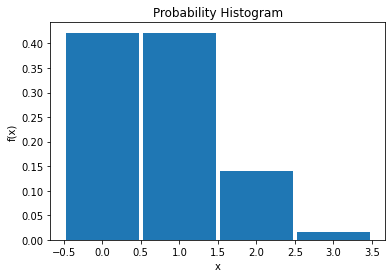

In [ ]:
from scipy.stats import binom

def calculate_pmf_bin3(n,p):
  x = list(range(n+1))
  print('Possible values of x: ', x)
  f_x = []
  '''
  for i in range(len(x)):
    comb = math.factorial(n)/(math.factorial(x[i]) * math.factorial(n-x[i]))
    f_x.append(comb*(p**x[i])*((1-p)**(n-x[i])))
  '''  
  f_x = [binom.pmf(r, n, p) for r in x] 

  print('\n pmf: \n')     
  table = PrettyTable(["x", "f(x)"])
  for index, item in enumerate(f_x):
    table.add_row([index, Fraction(item).limit_denominator()])
  print(table)
  return x, f_x  

x_3, f_x3 = calculate_pmf_bin3(3,0.25)
print('\n')
plt.bar(x_3, f_x3, width = 0.95)
plt.title("Probability Histogram")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()


## Multinominal Distribution
----

A multinominal experiment is when a binomial experiment (same properties) now allows more than two outcomes. Hence, we may think that an experiment may have outcomes such as excellent, good, bad, innaceptable rather than just good or bad.

<br>

Usually, if a given trial can result in any one of $k$ possible outcomes $E_1,E_2, \cdots , E_k$ with probabilities $p_1, p_2, \cdots , p_k$, then the **multinomial distribution** will give the probability that $E_1$ occurs $x_1$ times, $E_2$ occurs $x_2$ times, . . ., and $E_k$ occurs $x_k$ times in $n$ independent trials, where:

$$
x_1 + x_2 + \cdots + x_k = n.
$$

<br>

We shall denote this **joint probability distribution** by

$$
f(x_1, x_2, \cdots , x_k; p_1, p_2, \cdots , p_k, n),
$$

where, $p_1 + p_2 + \cdots + p_k = 1$, since the result of each trial must be one of the $k$ possible outcomes.

<br>

Question: What is a joint probability distribution? Study this subject.

<br>

Below, the definition of the multinomial distribution.

<br>


<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/multinom.png" alt="Drawing" width="600"/>

<br>

Moreover, ...

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/partition.png" alt="Drawing" width="600"/>

<br>
<br>

Ex: A bowl has 2 red cards, 3 blue cards and 5 white cards. A card is randomly selected and then placed back in the bowl. This is done 5 times. What is the probability of choosing 1 red card, 1 blue card, and 3 white cards?

R: $n$ is the number of trials = 5.

$k$ is the number of possible outcomes = 3.

$x_i$ is the number of occurrences of outcome i.

$p_i$ is the probability of seeing outcome i.

The problem states that:

$x_r = 1$ (red); $x_b = 1$ (blue); $x_w = 3$ (white).

Moreover:

$$
p_r = \frac{1}{5} \\
p_b = \frac{3}{10} \\
p_w = \frac{1}{2}
$$

Hence:

$$
f(x_r,x_b,x_w;p_r,p_b,p_w,n) = \frac{5!}{1!1!3!} \times (\frac{1}{5})^1 \times (\frac{3}{10})^1 \times (\frac{1}{2})^3 = 0.15
$$




In [ ]:
from scipy.stats import multinomial

rv = multinomial(5, [1/5, 3/10, 1/2])
prob = rv.pmf([1, 1, 3])
print('Probability - 1 red, 1 blue, and 3 white: ', prob)

Probability - 1 red, 1 blue, and 3 white:  0.15


## Discrete Uniform Distribution
----

The **discrete uniform distribution** is a symmetric probability distribution. A finite number of values are equally likely to be observed with probability $1/n$ in this situation. One application of the discrete uniform distribution is in survey sampling where each individual is equally likely to be chosen in the sample on a given draw. 

<br>

The distribution is <a href="https://distribution-explorer.github.io/discrete/discrete_uniform.html">parametrised</a> by the high ($x_{high}$) and low ($x_{low}$) allowed values. The pmf is:

$$
f(x;x_{low},x_{high}) = \frac{1}{x_{high} - x_{low} + 1} = \frac{1}{n}.
$$


<br>

The mean and variance are:

$$
\mu = \frac{x_{low} + x_{high}}{2} \\
\sigma^2 = \frac{(x_{high} - x_{low} + 1)^2 - 1}{12}.
$$

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/discreteprobpc.png" alt="Drawing" width="600"/>

Source: <a href="https://distribution-explorer.github.io/discrete/discrete_uniform.html">Distribution Explorer</a>




## Poisson Process and Poisson Distribution
----

One of the most used discrete probability distribution is the **Poisson** one. Telecommunications (telephone calls arriving), astronomy (photons arriving at a telescope), biology (number of mutations on a strand of DNA per unit length), business and management (customers arriving at a call centre), radioactivity (number of decays in a given time interval in a radioactive sample) are a few examples of applications of this discrete probability distribution.

<br>

This distribution is associated with a Poisson experiment in which numerical values of a random variable $X$, the number of outcomes occurring during a given **time interval** or in a **specified region**, are issued. The given time interval may be of any length, such as a minute, a day, a week, a month, or even a year. 

<br>

A Poisson experiment is derived from the **Poisson process**. The properties of the Poisson process are:

1. The number of outcomes occurring in one time interval or specified region of
space is independent of the number that occur in any other disjoint time interval or region. In this sense we say that the Poisson process has **no memory**;
2. The probability that a single outcome will occur during a very short time
interval or in a small region is proportional to the length of the time interval
or the size of the region and does not depend on the number of outcomes
occurring outside this time interval or region;
3. The probability that more than one outcome will occur in such a short time
interval or fall in such a small region is negligible. 

<br>

The number $X$ of outcomes occurring during a Poisson experiment is called a
**Poisson random variable**, and its probability distribution (pmf) is called the **Poisson distribution**. The mean number of outcomes is computed from $\mu = \lambda t$, where $t$ is the specific "time", "distance", "area", or "volume" of interest, and $\lambda$ is the **rate of occurrence of outcomes** (it is something per time unit or per region unit). Below is the definition of the Poisson distribution.



<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/poisson.png" alt="Drawing" width="600"/>

<br>

Note that it is more common to omit $t$ when defining the Poisson distribution. Also note that it is assumed that $\lambda > 0$. Hence, it is usual to see the definition below:

$$
p(x;\lambda)= \frac{e^{-\lambda}\lambda^x}{x!}.
$$

<br>
<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/poissonprobpc.png" alt="Drawing" width="600"/>

Source: <a href="https://distribution-explorer.github.io/discrete/poisson.html?highlight=poisson">Distribution Explorer</a>

<br>
<br>

The mean and variance of the Poisson distribution are both equals to $\lambda$.

**PS**: When solving problems "by hand", it is used to rely on tables which have sums of probabilities. In this case, a table that provides the <a href="https://raw.githubusercontent.com/vsantjr/CAP/master/CAP417/Extra/cdf_Poisson table.pdf">cdf</a> ($P (X \leq x)$) values of the Poisson distribution.

<br><br>

Ex: The average number of ships containing electronic devices arriving each day at the port of Santos is 10. The facilities at the port can handle at most 15 ships per day. What is the probability that on a given day ships have to be turned away?

R: $X$ = number of ships (electronics) arriving each day at the port of Santos.

$\lambda = 10$.

Hence,

$$
P(X > 15) = 1 - P(X<=15) = 1 - 0.9513 = 0.0487.
$$



Probabilities: [0.000e+00 3.000e-04 1.800e-03 6.200e-03 1.820e-02 3.740e-02 6.540e-02
 9.610e-02 1.086e-01 1.289e-01 1.282e-01 1.078e-01 9.100e-02 7.310e-02
 5.110e-02 3.530e-02 2.290e-02 1.270e-02 7.800e-03 3.900e-03 1.900e-03
 6.000e-04 6.000e-04 1.000e-04 0.000e+00 0.000e+00 0.000e+00 1.000e-04
 0.000e+00]

 Bins: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


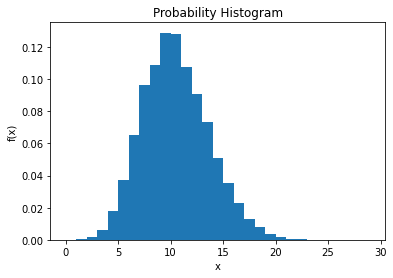

In [ ]:
import numpy as np

s = np.random.poisson(10, 10000)
count, bins, ignored = plt.hist(s, bins = list(range(0, 30)), density=True)
#count, bins, ignored = plt.hist(s, bins = 'auto', density=True)
print('Probabilities:', count)
print('\n Bins:', bins)
plt.title('Probability Histogram')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## Approximation of a Binomial Distribution by a Poisson Distribution
----

The Poisson and binomial distributions are indeed related. The Poisson distribution is usually applied to space and time problems but it can be viewed as a limiting form of the binomial distribution. 

<br>

The independence among Bernoulli trials related to the binomial distribution is consistent with principle 2 of the Poisson process. Allowing the parameter $p$ to be close to 0 is associated with principle 3 of the Poisson process. If $n$ is large and $p$ is close to 0, the Poisson distribution can be used, with $\mu = np$, to approximate binomial probabilities. If $p$ is close to 1, we can still use the Poisson distribution to approximate binomial probabilities by interchanging what we have defined to be a success and a failure,
thereby changing $p$ to a value close to 0 (hence $q$ will be close to 1).

<br>

<img src="https://raw.githubusercontent.com/vsantjr/CAP/master/Images/appbinpoisson.png" alt="Drawing" width="600"/>

<br>

Ex: In a certain industrial facility, accidents occur infrequently. It is known that the probability of an accident on any given day is 0.001 and accidents are independent of each other. What is the probability that in any given period of 2 years there will be an accident on one day?

R: Solving by a binomial distribution.

n = 730 days.

p = 0.001.

Hence:

$$
P(X = 1) = f(1) = b(1;730,0.001) = {730\choose 1} \times 0.001^1 \times (1-0.001)^{(730-1)} = 0.3520171130233785. 
$$

Solving by a Poisson distribution, where $\lambda = \mu = np = 730 \times 0.001 = 0.73$. Thus:

<br>

$$
P(X = 1) = f(1) = p(1;0.73)= \frac{e^{-0.73} \times 0.73^1}{1!} = 0.3517935627658478.
$$


## Symmetry of the Poisson Distribution
----

Many discrete and continuous probability distributions present a symmetric form. This is also the case of the Poisson distribution which becomes more and more symmetric, even bell-shaped, as the mean ($\lambda = \mu$) becomes larger. See <a href="https://distribution-explorer.github.io/discrete/poisson.html?highlight=poisson"> Distribution Explorer</a> for details.





## Exercise 2 (Practical)
----

The Global Precipitation Climatology Project (GPCP) is used as a reference dataset for accomplishing climate precipitation prediction. Consider part of one GPCP's dataset shown <a href="https://github.com/vsantjr/CAP/tree/master/CAP417/GPCP">here</a>. It has monthly data from 1980 to 2016.

<br>

The only relevant variable of this dataset for this exercise is **press**, the surface pressure (in millibars). Hence, each row in this dataset has data acquired in a location (latitude, longitude), in a certain year and month. Hence, first entry shows that in january/1980 in the specificied location (latitude and longitude), surface pressure (press) is 993.735 millibars, and in february/1980, in the same location, surface pressure is 995.384 millibars, and so on. 

<br>

Note that the values of each variable, including press, are continuous (real numbers). But here, we will define a random variable representing **the outcomes of high surface pressure measurements in one year**. A high surface pressure happens when the pressure is greater than the average of surface pressure values considering all months, years, and locations.  

<br>

Note that the discrete random variable described above can be perfectly considered a Poisson random variable since it satisfies all the properties of the Poisson process. 

<br>

Develop a program that can answer the following questions:

1.  What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,600 (note: ',' means thousands)?
2.  What is the probability that the outcomes of high surface pressure measurements in one year is exactly 5,830?
3.  What is the probability that the outcomes of high surface pressure measurements in one year is less than or equal to 10,000?
4.  What is the probability that the outcomes of high surface pressure measurements in one year is greater than 5,900?
5.  Show the probability histogram for this problem.


<br>

**Deadline**: 26 april 2022